In [ ]:
#importing important libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.metrics import Precision, Recall, F1Score
import warnings
warnings.filterwarnings('ignore')


In [46]:
# Dataset directories
TRAIN_DIR = "C:/Users/muthu/Downloads/train-20251228T024349Z-3-001/train"
VAL_DIR   = "C:/Users/muthu/Downloads/valid-20251228T024553Z-3-001/valid"
TEST_DIR  = "C:/Users/muthu/Downloads/test-20251227T061102Z-3-001/test"

In [ ]:
#image size and batch size

IMG_SIZE = (224,224)
BATCH    = 32


In [48]:
# Data augmentation + normalization
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
# Rescale
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Data loading and preprocessing
train_data = train_gen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH, class_mode='binary')

val_data = val_gen.flow_from_directory(
    VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH, class_mode='binary')

test_data = test_gen.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH, class_mode='binary')


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [51]:
# Transfer learning mode

base = ResNet50(include_top=False, input_shape=(224,224,3), weights="imagenet")
base.trainable = False  # freeze



In [ ]:
#model define
model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
#compile the model

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        Precision(name="precision"),
        Recall(name="recall"),
        
    ]
)


In [54]:
# Callbacks
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
mc = callbacks.ModelCheckpoint("classification_model.h5", save_best_only=True)


In [62]:
# Train
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    callbacks=[es, mc]
)

Epoch 1/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.7731 - loss: 0.4564 - precision: 0.7976 - recall: 0.6915 - val_accuracy: 0.7873 - val_loss: 0.4699 - val_precision: 0.7490 - val_recall: 0.8756
Epoch 2/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.7750 - loss: 0.4593 - precision: 0.7991 - recall: 0.6947 - val_accuracy: 0.6538 - val_loss: 0.6169 - val_precision: 0.5984 - val_recall: 0.9733
Epoch 3/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 295s 4s/step - accuracy: 0.7340 - loss: 0.5056 - precision: 0.7284 - recall: 0.6899 - val_accuracy: 0.7692 - val_loss: 0.4963 - val_precision: 0.7113 - val_recall: 0.9200
Epoch 4/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7803 - loss: 0.4518 - precision: 0.8291 - recall: 0.6707

84/84 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.7787 - loss: 0.4478 - precision: 0.8227 - recall: 0.6731 - val_accuracy: 0.7919 - val_loss: 0.4352 - val_precision: 0.8757 - val_recall: 0.6889
Epoch 5/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.7757 - loss: 0.4556 - precision: 0.7940 - recall: 0.7043 - val_accuracy: 0.8281 - val_loss: 0.4408 - val_precision: 0.8371 - val_recall: 0.8222
Epoch 6/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.7735 - loss: 0.4537 - precision: 0.7934 - recall: 0.6987 - val_accuracy: 0.8190 - val_loss: 0.4414 - val_precision: 0.8112 - val_recall: 0.8400
Epoch 7/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.7915 - loss: 0.4406 - precision: 0.8291 - recall: 0.6995 - val_accuracy: 0.8054 - val_loss: 0.4515 - val_precision: 0.7725 - val_recall: 0.8756
Epoch 8/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7769 - loss: 0.4519 - precision: 0.7989 - recall: 0.7003 - val_accuracy: 0.7964 - val_loss: 0.4534 - val_preci

In [63]:
# Evaluate on test set
print("Evaluating on test set:")
model.evaluate(test_data)

Evaluating on test set:
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8093 - loss: 0.4032 - precision: 0.8630 - recall: 0.6702


[0.40319472551345825,
 0.8093023300170898,
 0.8630136847496033,
 0.6702127456665039]

In [64]:
#Getting classification reports
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_data.classes
y_pred = model.predict(test_data).argmax(axis=1)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step
[[121   0]
 [ 94   0]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       121
           1       0.00      0.00      0.00        94

    accuracy                           0.56       215
   macro avg       0.28      0.50      0.36       215
weighted avg       0.32      0.56      0.41       215



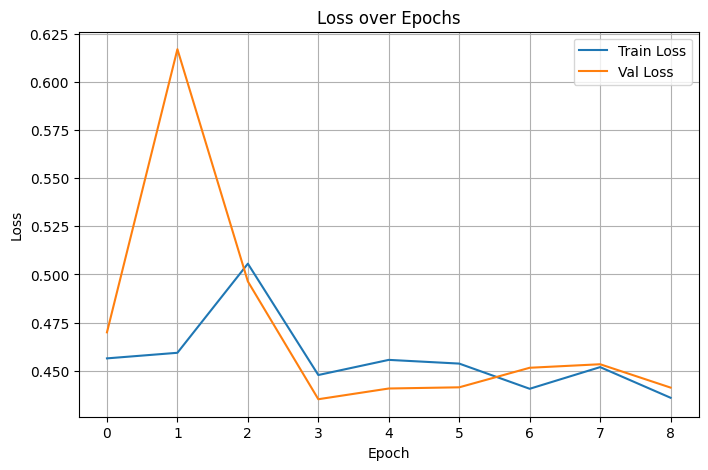

In [65]:
import matplotlib.pyplot as plt
# Loss plot
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.grid(True)
plt.show()

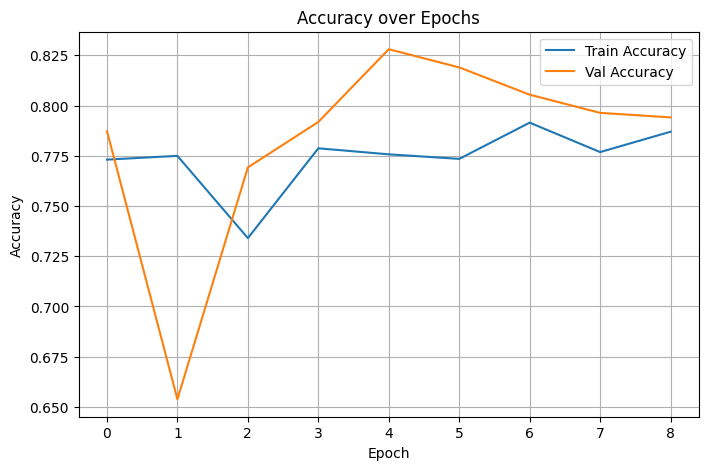

In [66]:
# Accuracy plot
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
#save the final model

model.save("final_model.h5")
